In [1]:
from PIL import Image
from pytesseract import image_to_string
import pytesseract
import numpy as np
import pandas as pd
import PIL
from PIL import Image, ImageFilter, ImageEnhance
import cv2
from matplotlib import pyplot as plt
# import Image

In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"

**Making Image Binary**

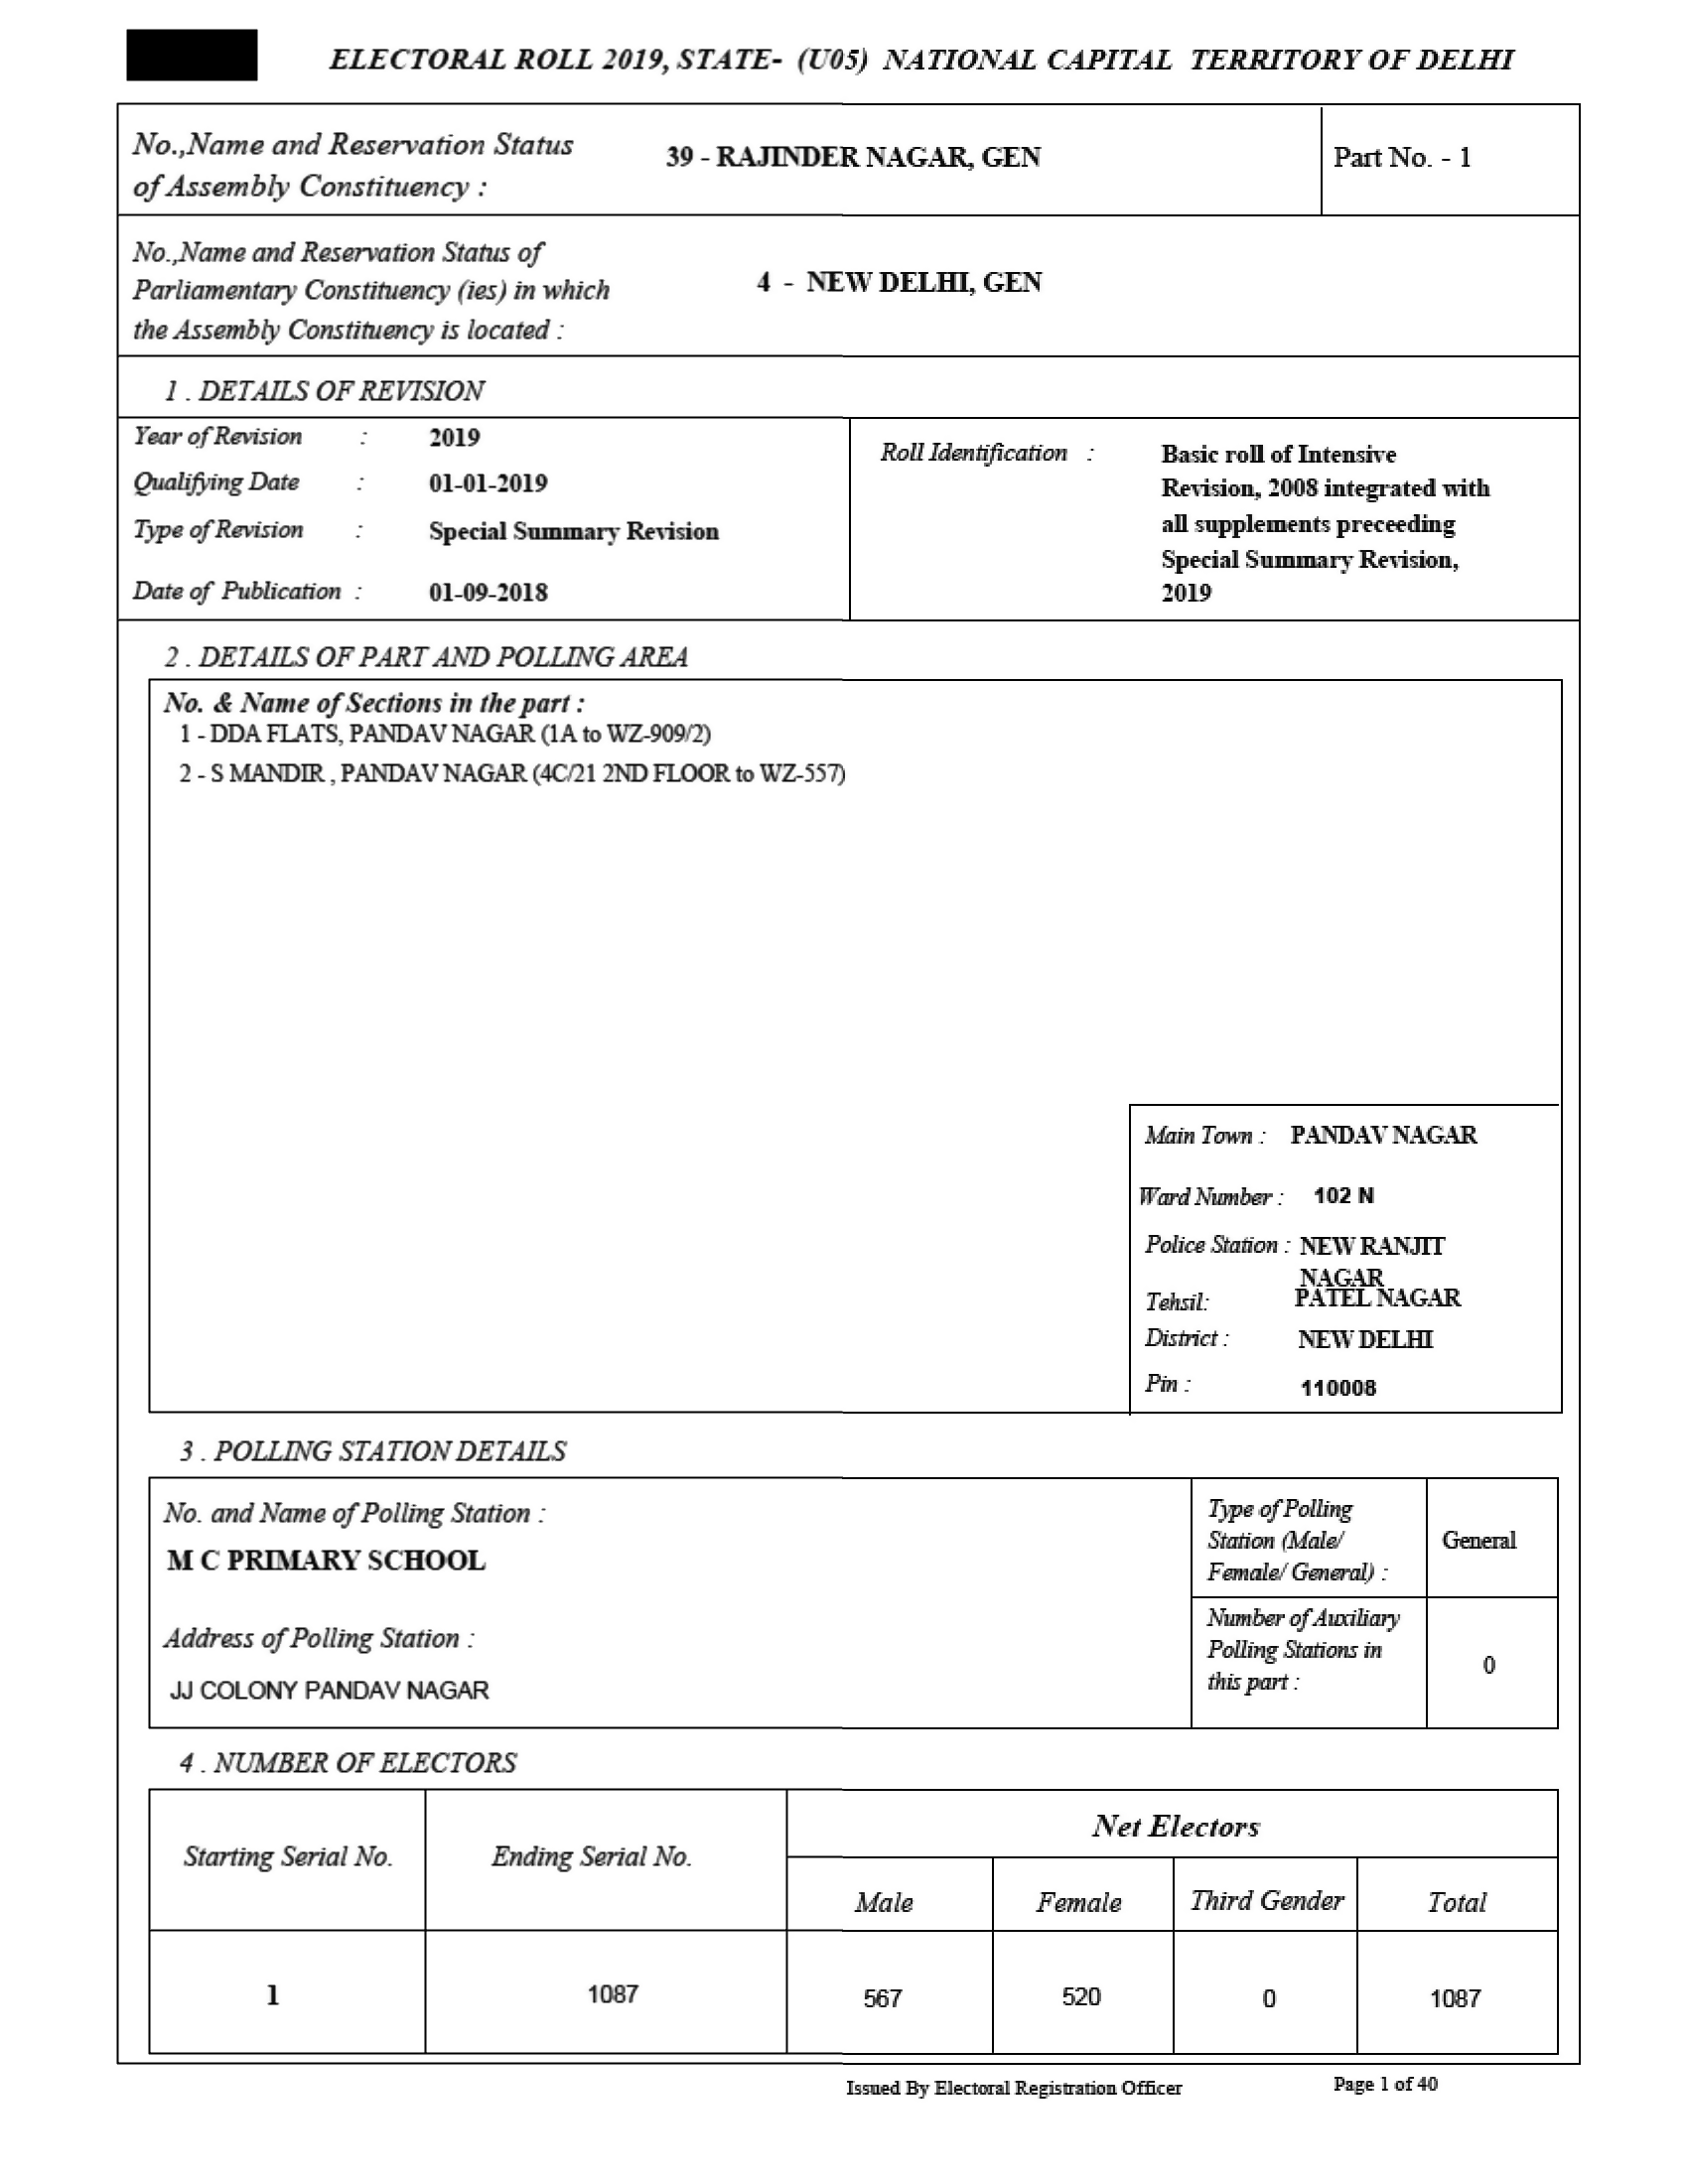

In [3]:
img = cv2.imread('AC0390001-01.jpg')
im = cv2.bilateralFilter(np.array(img,dtype=np.uint8),9,75,75)
imb = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ims  = Image.fromarray(imb)   
ims

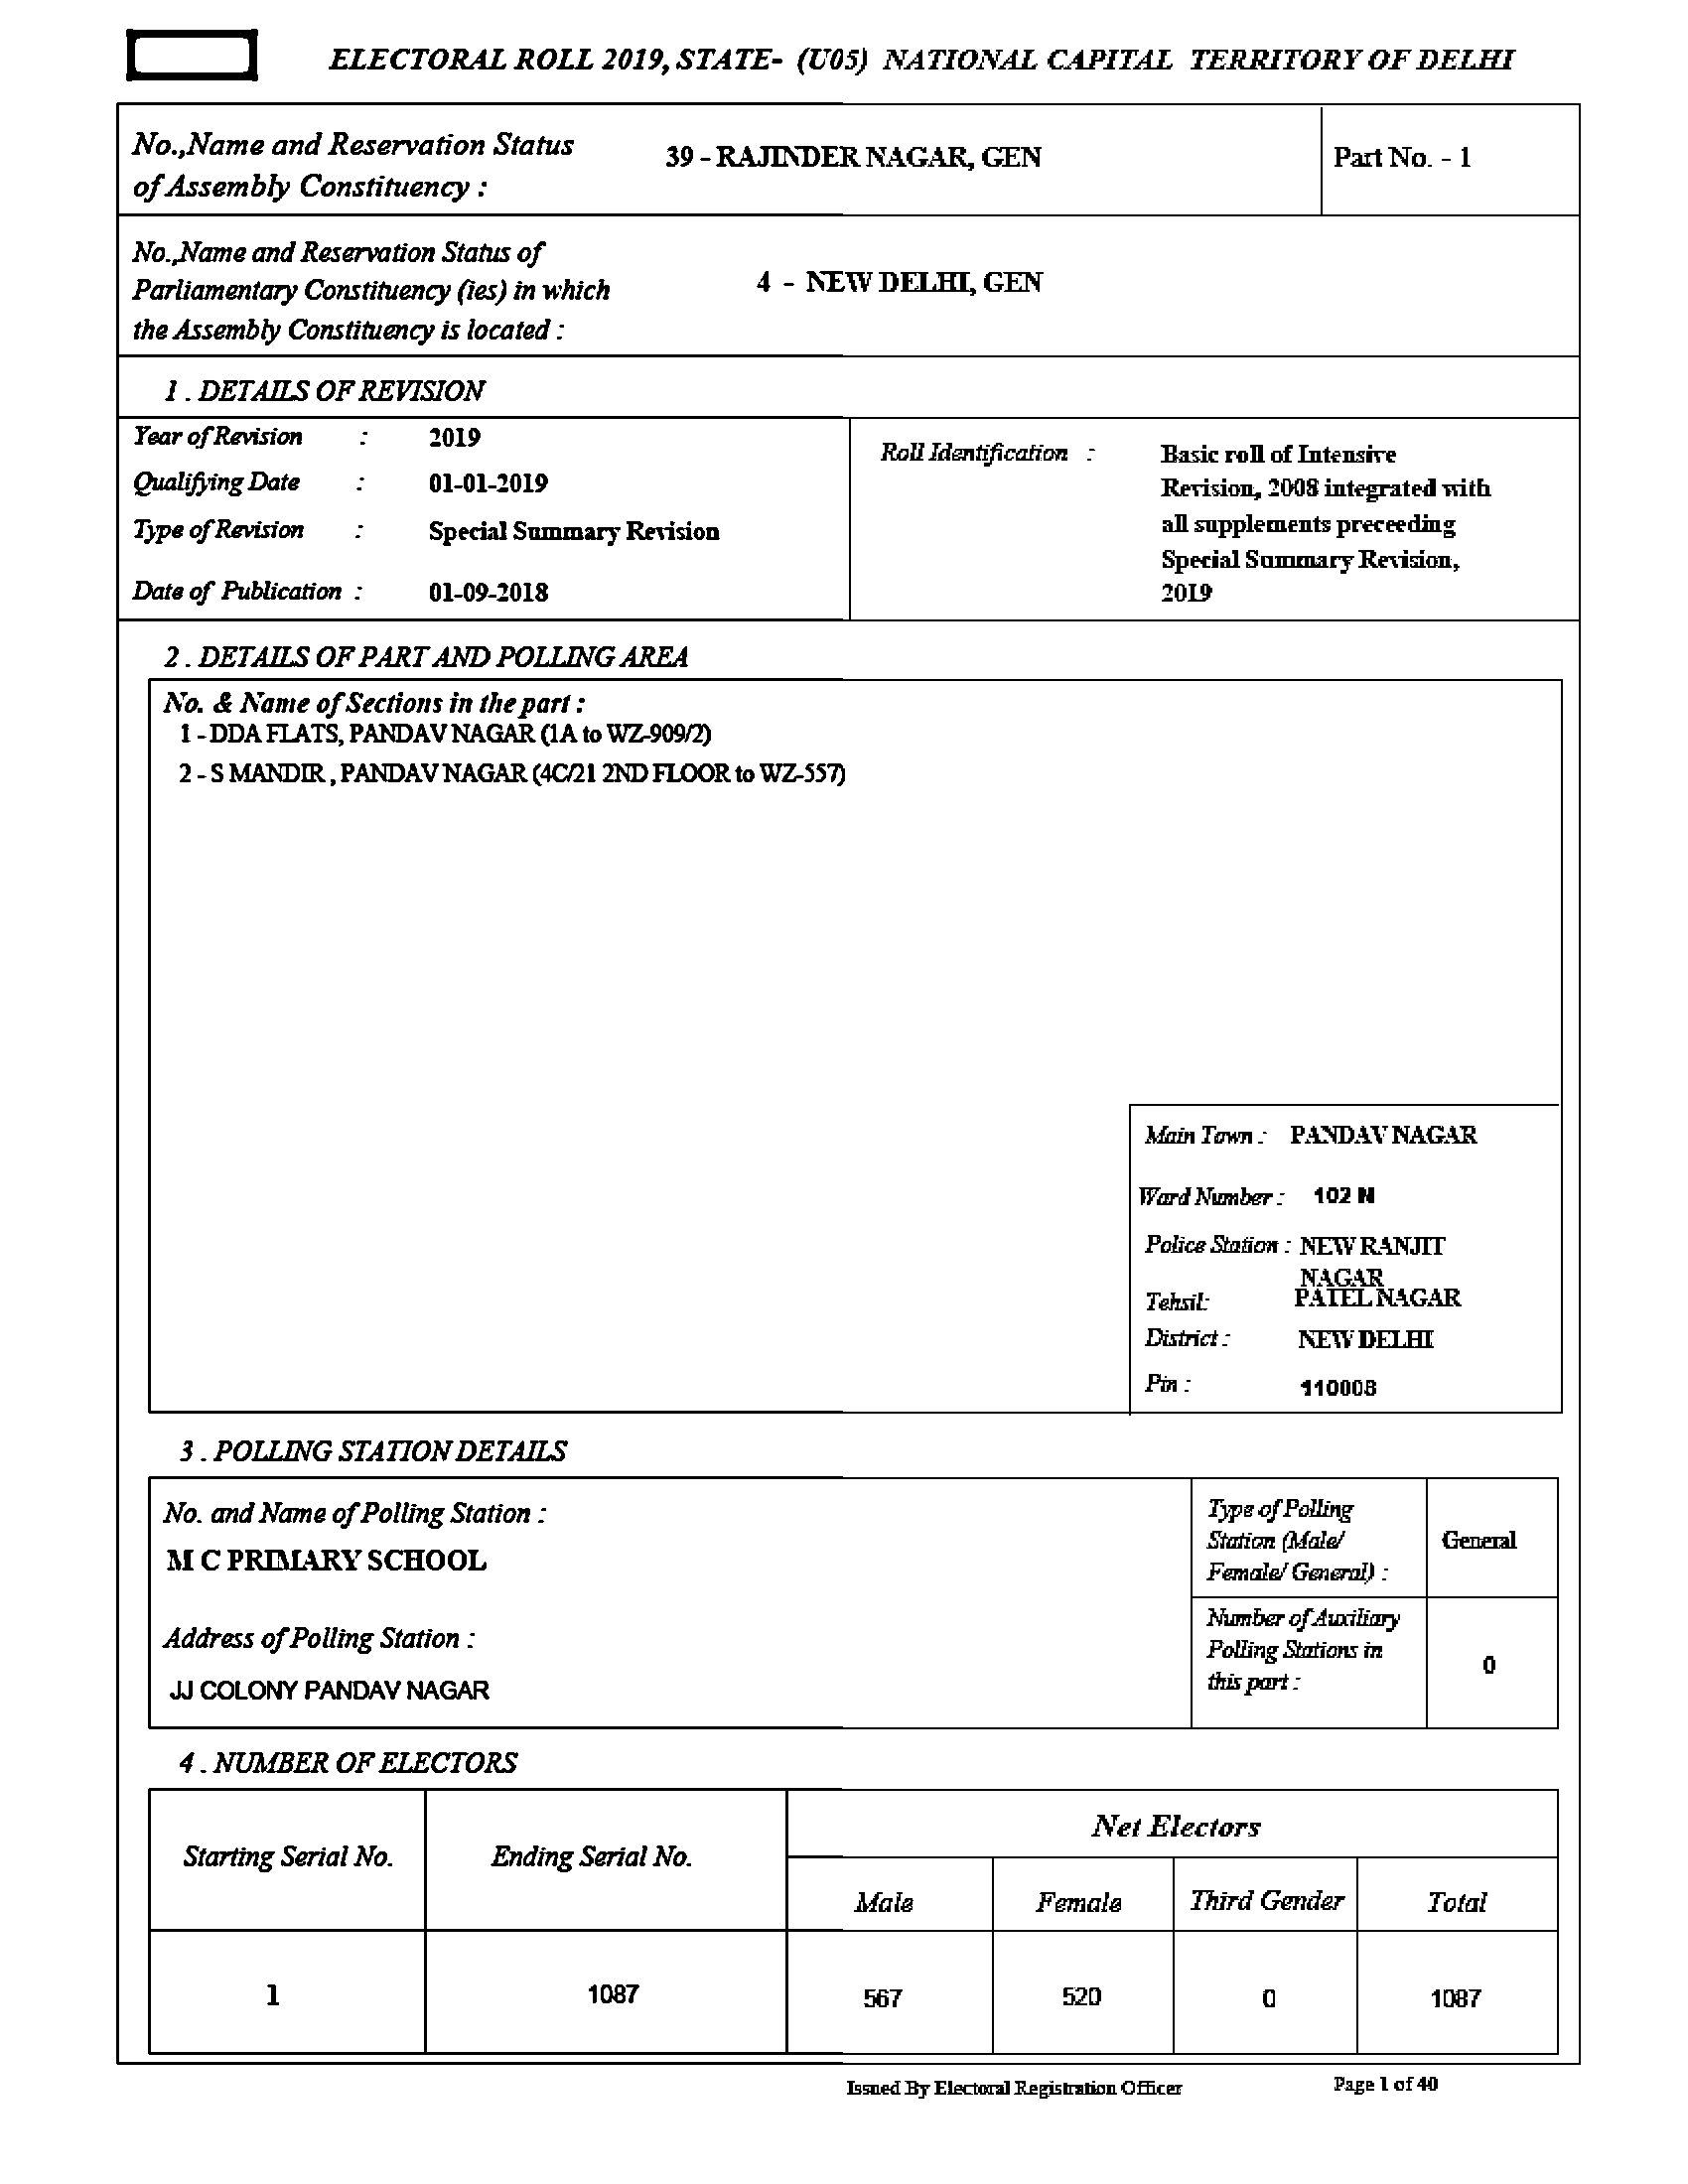

In [4]:
im = cv2.adaptiveThreshold(imb, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 10)
im = Image.fromarray(im)
im

**Things required to be extracted**

1. Vidhan Sabha name
2. Part No/Bhag Sankhya
3. Details of part and polling area/
4. Main Town/mukhya gaun
5. No. and name of polling station
6. Male/Female/Total
7. File Name

In [5]:
from PIL import Image

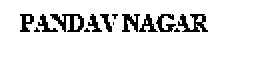

In [6]:
crop_rectangle_vs = ((722, 140, 975, 210))
cropped_im_vs = im.crop(crop_rectangle_vs)
crop_rectangle_bs = ((1470, 145, 1520, 180))
cropped_im_bs = im.crop(crop_rectangle_bs)
crop_rectangle_mg = ((1280, 1120, 1560, 1180))
cropped_im_mg = im.crop(crop_rectangle_mg)
crop_rectangle_psn = ((160, 1560, 1000, 1600))
cropped_im_psn = im.crop(crop_rectangle_psn)
crop_rectangle_psa = ((210, 725, 850, 760))
cropped_im_psa = im.crop(crop_rectangle_psa)
crop_rectangle_male = ((800, 1960, 920, 2050))
cropped_im_male = im.crop(crop_rectangle_male)
crop_rectangle_fem = ((1040, 1960, 1110, 2060))
cropped_im_fem = im.crop(crop_rectangle_fem)
crop_rectangle_tot = ((1440, 1960, 1500, 2060))
cropped_im_tot = im.crop(crop_rectangle_tot)
cropped_im_mg

In [7]:
import glob
onlyfiles = glob.glob('C:/Users/ankur/Desktop/Extraction/Rajindra Nagar/Front_Page_1/*-01.jpg')
def img_to_txt(x):
    s = x.split('/')
    s = s[6].split("-")[0]
    im = cv2.imread (x)
    im = cv2.bilateralFilter(np.array(im,dtype=np.uint8),9,75,75)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
    im = Image.fromarray(im)
    cropped_im_vs = im.crop(crop_rectangle_vs)
    c_vs = image_to_string(cropped_im_vs,lang = 'eng',config='c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzQWERTYUIOPASDFGHJKLZXCVBNM --psm 6')
    cropped_im_bs = im.crop(crop_rectangle_bs)
    c_bs = image_to_string(cropped_im_bs,lang = 'eng',config='c tessedit_char_whitelist=0123456789 --psm 6')
    cropped_im_mg = im.crop(crop_rectangle_mg)
    c_mg = image_to_string(cropped_im_mg,lang = 'eng',config='c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzQWERTYUIOPASDFGHJKLZXCVBNM--psm 6')
    cropped_im_psn = im.crop(crop_rectangle_psn)
    c_psn = image_to_string(cropped_im_psn,lang = 'eng',config='c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzQWERTYUIOPASDFGHJKLZXCVBNM --psm 6')
    cropped_im_psa = im.crop(crop_rectangle_psa)
    c_psa = image_to_string(cropped_im_psa,lang = 'eng',config='c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzQWERTYUIOPASDFGHJKLZXCVBNM --psm 6')
    cropped_im_male = im.crop(crop_rectangle_male)
    c_male = image_to_string(cropped_im_male,lang = 'eng',config='c tessedit_char_whitelist=0123456789 --psm 6')
    cropped_im_fem = im.crop(crop_rectangle_fem)
    c_fem = image_to_string(cropped_im_fem,lang = 'eng',config='c tessedit_char_whitelist=0123456789 --psm 6')
    cropped_im_tot = im.crop(crop_rectangle_tot)
    c_tot = image_to_string(cropped_im_tot,lang = 'eng',config='c tessedit_char_whitelist=0123456789 --psm 6')
    return c_vs,c_bs,c_mg,c_psn,c_psa,s,c_male,c_fem,c_tot


In [8]:
vidhnsbha = []
bhag_snkhya = []
main_vil = []
PS_name = []
PS_add = []
file_name = []
male = []
female = []
total = []
for i in onlyfiles:
    a,b,c,d,e,s,m,f,o = img_to_txt(i)
    vidhnsbha.append(a)
    bhag_snkhya.append(b)
    main_vil.append(c)
    PS_name.append(d)
    PS_add.append(e)
    file_name.append(s)
    male.append(m)
    female.append(f)
    total.append(o)

In [9]:
import numpy as np
front_page = pd.DataFrame(np.column_stack([vidhnsbha, bhag_snkhya, main_vil,PS_name,PS_add,male,female,total,file_name]), 
                               columns=['vidhan_sabha', 'bhag_sankhya', 'main_vil','PS_name','PS_add','male','female','total','file_name'])

In [10]:
front_page.head(10)

,vidhan_sabha,bhag_sankhya,main_vil,PS_name,PS_add,male,female,total,file_name
0,RAJEVDER NAGAR,,PANDAV NAGAR,M C PRIMARY SCHOOL,"DDA HATS, PANDAV NAGAR (1A to WZ-909f2)",567,520,1087,Front_Page_1\AC0390001
1,RAJEVDER NAGAR,,PANDAV NAGAR,M C PRIMARY SCHOOL,"BLOCK—A, PANDAV NAGAR (A-I lo WZ—909I2)",643,449,1092,Front_Page_1\AC0390002
2,RAJEVDER NAGAR,,PANDAV NAGAR,M C PRIMARY SCHOOL,"BLOCK—A, PANDAV NAGAR (3A to HNO-338)",496,,853,Front_Page_1\AC0390003
3,RAJEVDER NAGAR,,PANDAV NAGAR,M C PRIMARY SCHOOL,"BLOCK—A, PANDAV NAGAR (51A to WZ—796)",489,416,905,Front_Page_1\AC0390004
4,RAJEVDER NAGAR,,PANDAV NAGAR,CHILDREN EDUCATION CENTRE,"BLOCK-A, PANDAV NAGAR (A- to WZ-910)",HE),408,97B,Front_Page_1\AC0390005
5,RAJEVDER NAGAR,,PANDAV NAGAR,CHILDREN EDUCATION CENTRE,T.C CAMP PANDAV NAGAR (1 to W864),735,499,1234,Front_Page_1\AC0390006
6,RAJEVDER NAGAR,,PANDAV NAGAR,M C PRIMARY SCHOOL,SHOPS T C CAMP PANDAV NAGAR (l mWMl/D),,37E),902,Front_Page_1\AC0390007
7,RAJEVDER NAGAR,,PANDAV NAGAR,M C PRIMARY SCHOOL,"BLOCK—B, PANDAV NAGAR (3/8 to WZ-430R)",,448,1025,Front_Page_1\AC0390008
8,RAJEVDER NAGAR,,PANDAV NAGAR,M C PRIMARY SCHOOL,"BLOCK—B, PANDAV NAGAR (2-A to WZ—829/l)",509,401,910‘,Front_Page_1\AC0390009
9,RAJEVDER NAGAR,,PANDAV NAGAR,M C PRIMARY SCHOOL,"BLOCK—B, PANDAV NAGAR (8/383 00 13-589)",,,775,Front_Page_1\AC0390010


In [11]:
front_page.to_excel("front_page.xlsx",index = False)

In [12]:
front_page.head()

,vidhan_sabha,bhag_sankhya,main_vil,PS_name,PS_add,male,female,total,file_name
0,RAJEVDER NAGAR,,PANDAV NAGAR,M C PRIMARY SCHOOL,"DDA HATS, PANDAV NAGAR (1A to WZ-909f2)",567,520,1087,Front_Page_1\AC0390001
1,RAJEVDER NAGAR,,PANDAV NAGAR,M C PRIMARY SCHOOL,"BLOCK—A, PANDAV NAGAR (A-I lo WZ—909I2)",643,449,1092,Front_Page_1\AC0390002
2,RAJEVDER NAGAR,,PANDAV NAGAR,M C PRIMARY SCHOOL,"BLOCK—A, PANDAV NAGAR (3A to HNO-338)",496,,853,Front_Page_1\AC0390003
3,RAJEVDER NAGAR,,PANDAV NAGAR,M C PRIMARY SCHOOL,"BLOCK—A, PANDAV NAGAR (51A to WZ—796)",489,416,905,Front_Page_1\AC0390004
4,RAJEVDER NAGAR,,PANDAV NAGAR,CHILDREN EDUCATION CENTRE,"BLOCK-A, PANDAV NAGAR (A- to WZ-910)",HE),408,97B,Front_Page_1\AC0390005


In [13]:
front_page.shape

(117, 9)